<a href="https://colab.research.google.com/github/MunazaAshraf/DIP-/blob/main/ML_ASSIGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from scipy.stats import mode


Importing Data

In [ ]:
dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
dataset.head()

,Glucose,Age,Outcome
0,148,50,1
1,85,31,0
2,183,32,1
3,89,21,0
4,137,33,1


In [ ]:
X =dataset.drop('Outcome',axis=1)
Y = dataset['Outcome']

In [ ]:
print(X)
print(Y)

     Glucose  Age
0        148   50
1         85   31
2        183   32
3         89   21
4        137   33
..       ...  ...
763      101   63
764      122   27
765      121   30
766      126   47
767       93   23

[768 rows x 2 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


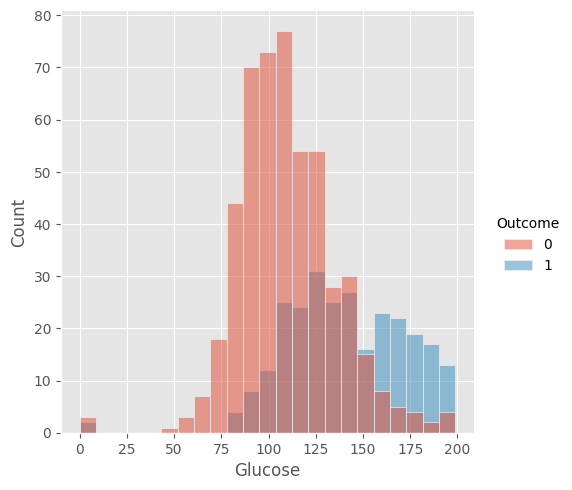

In [ ]:
sns.displot(dataset, x='Glucose',hue='Outcome')

In [ ]:
#Euclidean Distance
def euclidean_distance(pt1, pt2):
  distance = np.sqrt(np.sum(pt1-pt2)**2)
  return distance

In [ ]:
#KNN CLASSIFIER
def KNN(X_train, X_test, Y_train, Y_test,k_val):
  y_hat = []
  for test_pt in X_test.to_numpy():
    distances = []
    for i in range(len(X_train)):
      distances.append(euclidean_distance((np.array(X_train.iloc[i])),test_pt))

    distance_data = pd.DataFrame(data = distances, columns=['distance'],index=Y_train.index)
    
    k_neighbors_list = distance_data.sort_values(by=['distance'],axis=0)[:k_val]
    
    labels = Y_train.loc[k_neighbors_list.index]

    voting = mode(labels).mode[0]

    y_hat.append(voting)
  return y_hat



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.3,random_state=42)
y_hat_test = KNN(X_train, X_test, Y_train, Y_test, k_val = 5)

<ipython-input-40-ca465f22669c>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting = mode(labels).mode[0]
<ipython-input-40-ca465f22669c>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting = mode(labels).mode[0]
<ipython-input-40-ca465f22669c>:15: Futu

Streaming output truncated to the last 5000 lines.
<ipython-input-40-ca465f22669c>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting = mode(labels).mode[0]
<ipython-input-40-ca465f22669c>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting = mode(label

ValueError: ignored

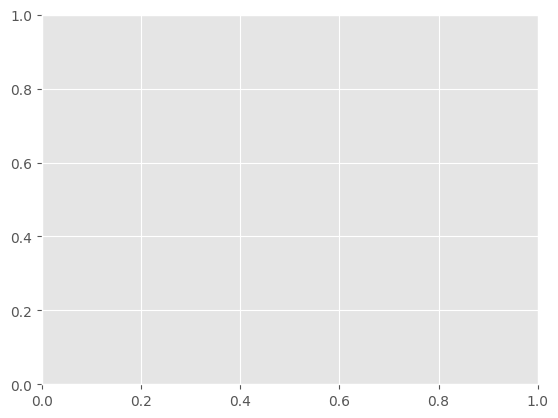

In [ ]:
accuracy_vals = []
for i in range(1,15):
  y_hat_test = KNN(X_train,X_test, Y_train, Y_test ,k_val=i)
  accuracy_vals.append(accuracy_score(Y_test, y_hat_test))
plt.plot(range(1,15),accuracy_vals,color='blue', marker='x',linestyle='mark')

<ipython-input-40-ca465f22669c>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting = mode(labels).mode[0]
<ipython-input-40-ca465f22669c>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting = mode(labels).mode[0]
<ipython-input-40-ca465f22669c>:15: Futu

0.696969696969697


Text(0.5, 1.0, 'KNN Results')

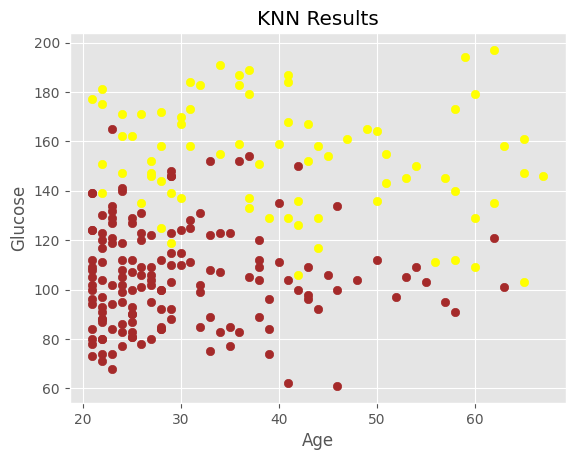

In [ ]:
y_hat_test = KNN(X_train,X_test,Y_train,Y_test,k_val=5)
print(accuracy_score(Y_test,y_hat_test))

for i in range(len(y_hat_test)):
  if(y_hat_test[i]==0):
    plt.scatter(X_test.iloc[i]['Age'],X_test.iloc[i]['Salary'],color='blue')
  if(y_hat_test[i]==1):
    plt.scatter(X_test.iloc[i]['Age'],X_test.iloc[i]['Salary'],color='orange')
plt.style.use('ggplot')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('KNN Results')

<Axes: xlabel='Age', ylabel='Salary'>

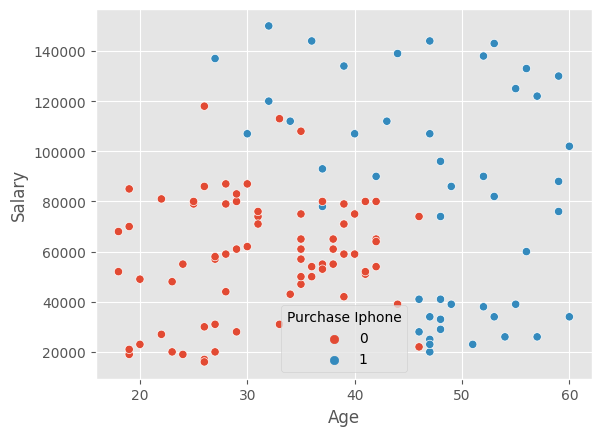

In [ ]:
sns.scatterplot(data=dataset,x=X_test['Age'],y=X_test['Salary'],hue='Purchase Iphone')